# Vehicle Insurance Data Preprocessing
This notebook handles data loading, exploration, and preprocessing for the vehicle insurance premium prediction model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the vehicle insurance dataset
try:
    df = pd.read_csv('../dataset/Insurance_claims_data_uncleaned.csv')
    print(f"Dataset loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print("Dataset not found. Creating sample vehicle insurance data...")
    # Create vehicle insurance sample data instead of health insurance
    np.random.seed(42)
    n_samples = 1000
    
    # Vehicle makes and models
    makes = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan', 'BMW', 'Mercedes', 'Audi', 'Hyundai', 'Kia']
    models = ['Camry', 'Accord', 'F150', 'Silverado', 'Altima', 'X3', 'C300', 'A4', 'Elantra', 'Sorento']
    
    df = pd.DataFrame({
        'driver_age': np.random.randint(18, 70, n_samples),
        'driver_gender': np.random.choice(['male', 'female'], n_samples),
        'years_experience': np.random.randint(0, 40, n_samples),
        'vehicle_make': np.random.choice(makes, n_samples),
        'vehicle_model': np.random.choice(models, n_samples),
        'vehicle_year': np.random.randint(2010, 2024, n_samples),
        'vehicle_value': np.random.randint(15000, 60000, n_samples),
        'annual_mileage': np.random.randint(5000, 30000, n_samples),
        'location': np.random.choice(['urban', 'suburban', 'rural'], n_samples),
        'coverage_type': np.random.choice(['liability', 'comprehensive'], n_samples, p=[0.3, 0.7]),
        'deductible': np.random.choice([250, 500, 1000], n_samples),
        'accidents_last_3_years': np.random.poisson(0.5, n_samples),
        'violations_last_3_years': np.random.poisson(0.3, n_samples),
        'credit_score': np.random.randint(550, 850, n_samples)
    })
    
    # Create realistic premium based on features
    base_premium = 1000
    age_factor = np.where(df['driver_age'] < 25, 800, np.where(df['driver_age'] > 60, 300, 0))
    experience_factor = np.maximum(0, (5 - df['years_experience']) * 100)
    vehicle_value_factor = df['vehicle_value'] * 0.02
    mileage_factor = df['annual_mileage'] * 0.05
    location_factor = np.where(df['location'] == 'urban', 400, np.where(df['location'] == 'suburban', 200, 0))
    coverage_factor = np.where(df['coverage_type'] == 'comprehensive', 600, 0)
    deductible_factor = np.where(df['deductible'] == 250, 200, np.where(df['deductible'] == 500, 100, 0))
    accident_factor = df['accidents_last_3_years'] * 500
    violation_factor = df['violations_last_3_years'] * 300
    credit_factor = np.maximum(0, (750 - df['credit_score']) * 2)
    
    df['premium'] = (base_premium + age_factor + experience_factor + vehicle_value_factor + 
                    mileage_factor + location_factor + coverage_factor - deductible_factor +
                    accident_factor + violation_factor + credit_factor + 
                    np.random.normal(0, 200, n_samples))
    df['premium'] = np.maximum(df['premium'], 800)  # Minimum premium
    
    print(f"Sample vehicle insurance dataset created! Shape: {df.shape}")

Dataset loaded successfully! Shape: (101, 15)


In [3]:
# Explore the dataset
print("Vehicle Insurance Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Vehicle Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               101 non-null    int64 
 1   driver_gender            101 non-null    object
 2   years_experience         101 non-null    int64 
 3   vehicle_make             101 non-null    object
 4   vehicle_model            101 non-null    object
 5   vehicle_year             101 non-null    int64 
 6   vehicle_value            101 non-null    int64 
 7   annual_mileage           101 non-null    int64 
 8   location                 101 non-null    object
 9   coverage_type            101 non-null    object
 10  deductible               101 non-null    int64 
 11  accidents_last_3_years   101 non-null    int64 
 12  violations_last_3_years  101 non-null    int64 
 13  credit_score             101 non-null    int64 
 14  premium   

,driver_age,driver_gender,years_experience,vehicle_make,vehicle_model,vehicle_year,vehicle_value,annual_mileage,location,coverage_type,deductible,accidents_last_3_years,violations_last_3_years,credit_score,premium
0,25,male,3,Toyota,Camry,2018,22000,12000,urban,comprehensive,500,0,1,720,1850
1,45,female,20,Honda,Accord,2015,18000,8000,suburban,liability,1000,1,0,780,1200
2,22,male,1,BMW,X3,2020,45000,15000,urban,comprehensive,250,0,2,650,3200
3,35,female,15,Ford,F150,2017,28000,20000,rural,comprehensive,500,2,0,740,2100
4,28,male,8,Nissan,Altima,2019,24000,10000,suburban,comprehensive,1000,0,0,800,1450


In [4]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,driver_age,years_experience,vehicle_year,vehicle_value,annual_mileage,deductible,accidents_last_3_years,violations_last_3_years,credit_score,premium
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,35.366337,14.396040,2018.316832,31821.782178,13277.227723,636.138614,0.376238,0.613861,765.346535,1962.871287
std,9.071629,8.429803,2.053926,9707.106716,4007.789445,272.774523,0.597520,0.905210,59.942712,442.414594
min,19.000000,0.000000,2014.000000,16000.000000,6000.000000,250.000000,0.000000,0.000000,580.000000,1180.000000
25%,28.000000,7.000000,2017.000000,25000.000000,10000.000000,500.000000,0.000000,0.000000,740.000000,1650.000000
50%,35.000000,15.000000,2018.000000,31000.000000,13000.000000,500.000000,0.000000,0.000000,770.000000,1920.000000
75%,43.000000,21.000000,2020.000000,36000.000000,16000.000000,1000.000000,1.000000,1.000000,800.000000,2200.000000
max,52.000000,30.000000,2022.000000,75000.000000,25000.000000,1000.000000,2.000000,4.000000,870.000000,3500.000000


In [5]:
# Check for missing values and outliers
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Handle vehicle insurance specific data cleaning
if missing_values.sum() > 0:
    print("\nHandling missing values...")
    # Fill numerical missing values with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    
    # Fill categorical missing values with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    print("Missing values handled!")
else:
    print("No missing values found!")

# Cap extreme values
df['accidents_last_3_years'] = np.minimum(df['accidents_last_3_years'], 5)
df['violations_last_3_years'] = np.minimum(df['violations_last_3_years'], 5)
print("Outliers capped for accidents and violations.")

Missing Values:
driver_age                 0
driver_gender              0
years_experience           0
vehicle_make               0
vehicle_model              0
vehicle_year               0
vehicle_value              0
annual_mileage             0
location                   0
coverage_type              0
deductible                 0
accidents_last_3_years     0
violations_last_3_years    0
credit_score               0
premium                    0
dtype: int64
No missing values found!
Outliers capped for accidents and violations.


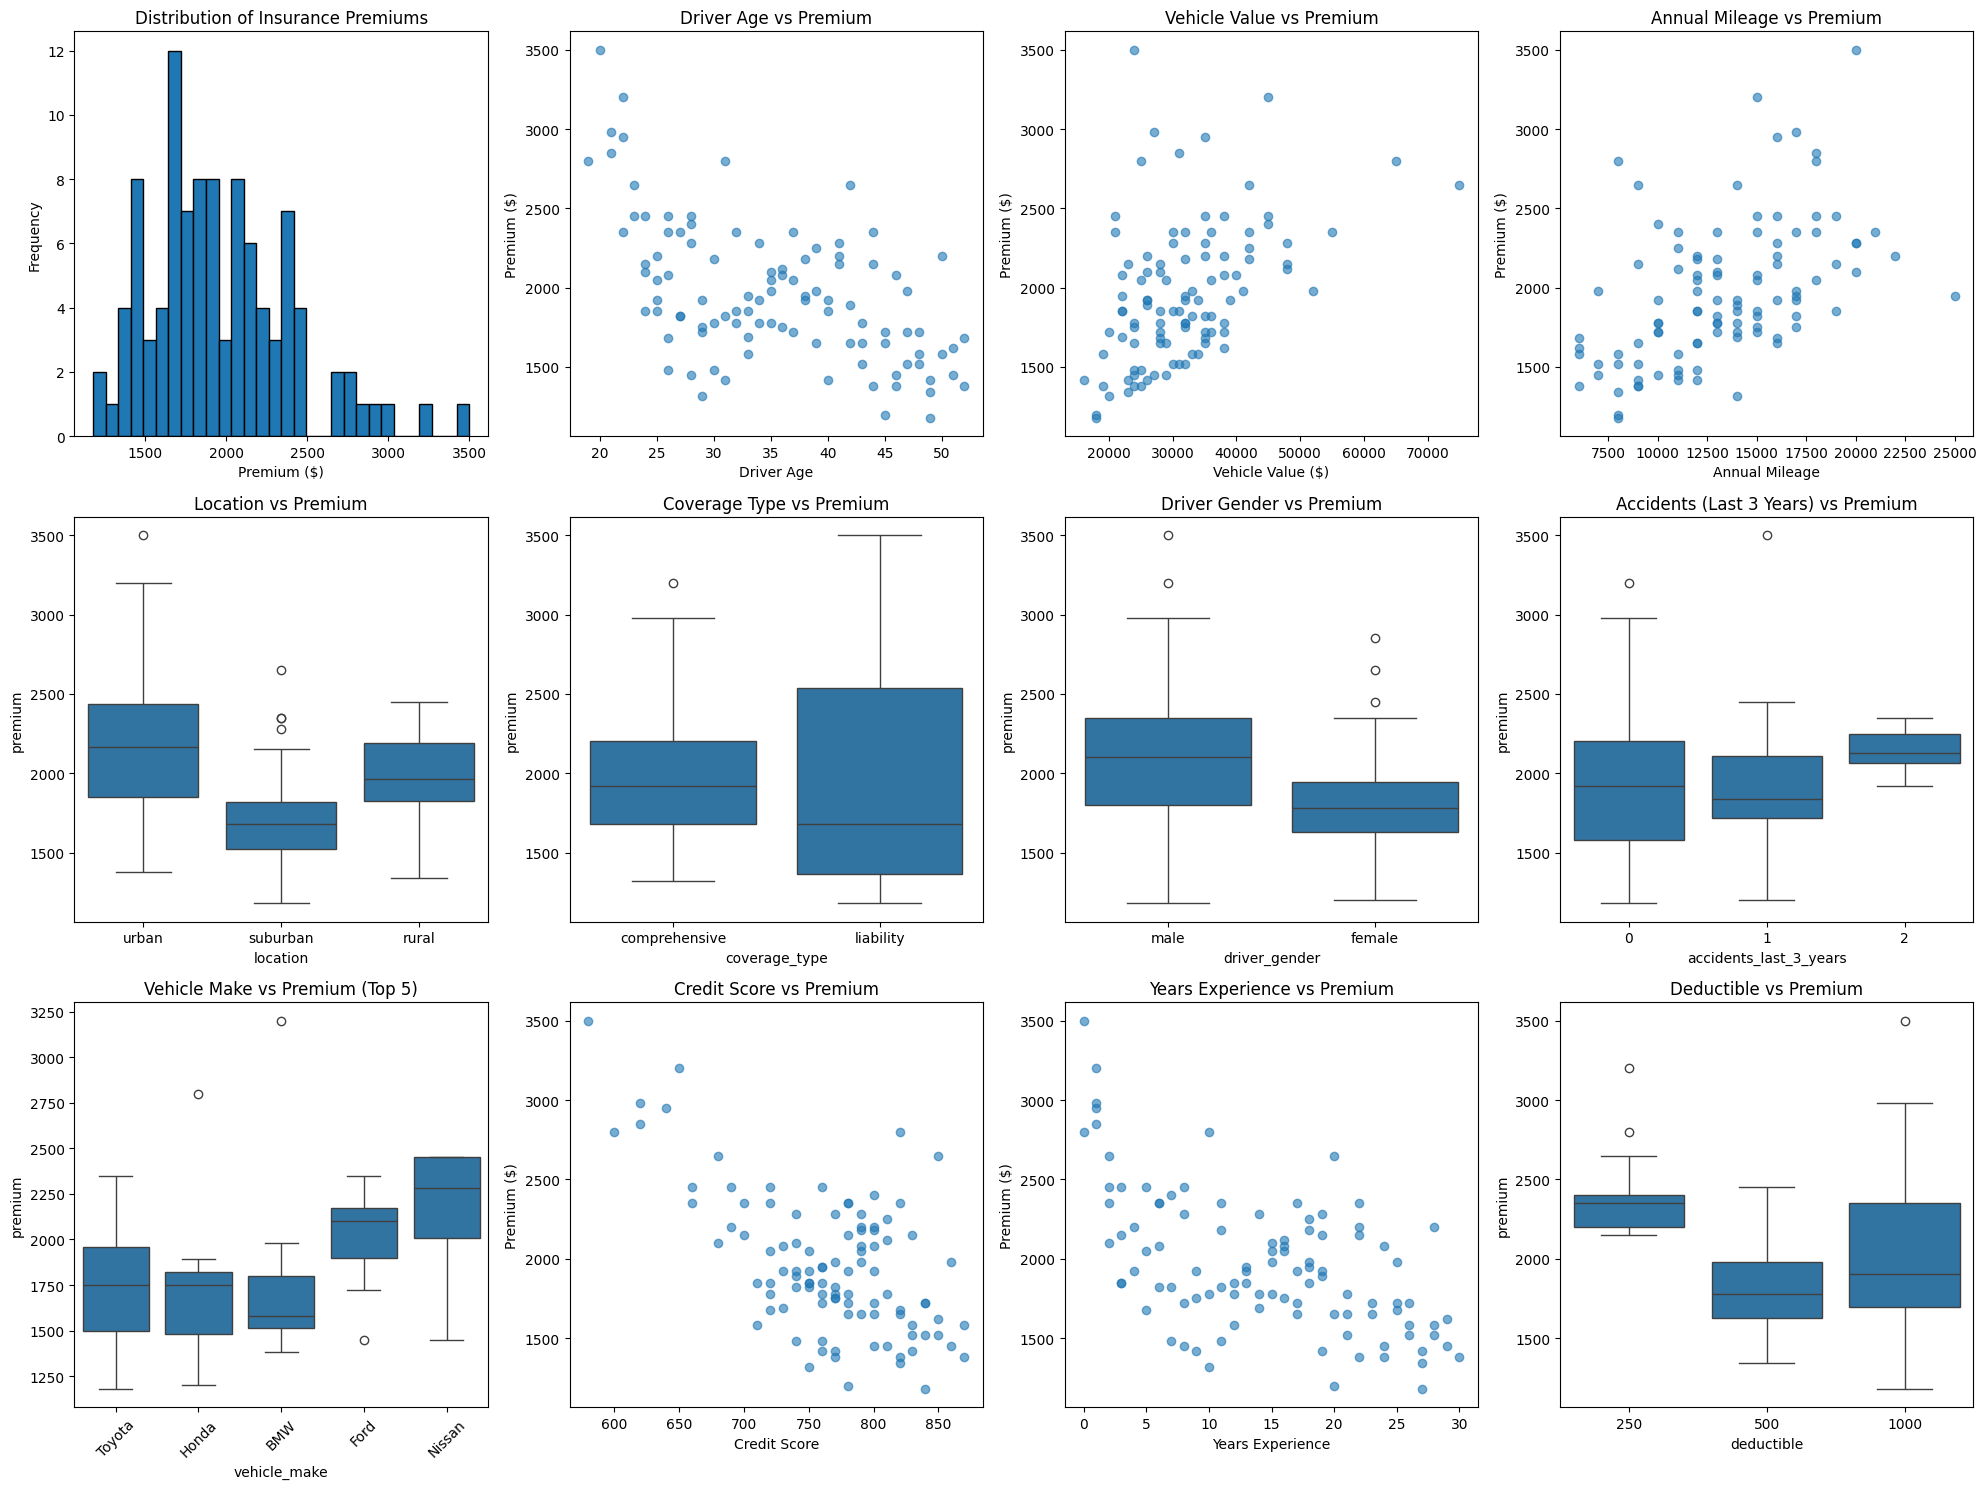

In [6]:
# Vehicle insurance specific visualizations
plt.figure(figsize=(20, 15))

# Distribution of premiums
plt.subplot(3, 4, 1)
plt.hist(df['premium'], bins=30, edgecolor='black')
plt.title('Distribution of Insurance Premiums')
plt.xlabel('Premium ($)')
plt.ylabel('Frequency')

# Driver Age vs Premium
plt.subplot(3, 4, 2)
plt.scatter(df['driver_age'], df['premium'], alpha=0.6)
plt.title('Driver Age vs Premium')
plt.xlabel('Driver Age')
plt.ylabel('Premium ($)')

# Vehicle Value vs Premium
plt.subplot(3, 4, 3)
plt.scatter(df['vehicle_value'], df['premium'], alpha=0.6)
plt.title('Vehicle Value vs Premium')
plt.xlabel('Vehicle Value ($)')
plt.ylabel('Premium ($)')

# Annual Mileage vs Premium
plt.subplot(3, 4, 4)
plt.scatter(df['annual_mileage'], df['premium'], alpha=0.6)
plt.title('Annual Mileage vs Premium')
plt.xlabel('Annual Mileage')
plt.ylabel('Premium ($)')

# Location vs Premium
plt.subplot(3, 4, 5)
sns.boxplot(data=df, x='location', y='premium')
plt.title('Location vs Premium')

# Coverage Type vs Premium
plt.subplot(3, 4, 6)
sns.boxplot(data=df, x='coverage_type', y='premium')
plt.title('Coverage Type vs Premium')

# Gender vs Premium
plt.subplot(3, 4, 7)
sns.boxplot(data=df, x='driver_gender', y='premium')
plt.title('Driver Gender vs Premium')

# Accidents vs Premium
plt.subplot(3, 4, 8)
sns.boxplot(data=df, x='accidents_last_3_years', y='premium')
plt.title('Accidents (Last 3 Years) vs Premium')

# Vehicle Make vs Premium (top 5)
plt.subplot(3, 4, 9)
top_makes = df['vehicle_make'].value_counts().head().index
df_top_makes = df[df['vehicle_make'].isin(top_makes)]
sns.boxplot(data=df_top_makes, x='vehicle_make', y='premium')
plt.title('Vehicle Make vs Premium (Top 5)')
plt.xticks(rotation=45)

# Credit Score vs Premium
plt.subplot(3, 4, 10)
plt.scatter(df['credit_score'], df['premium'], alpha=0.6)
plt.title('Credit Score vs Premium')
plt.xlabel('Credit Score')
plt.ylabel('Premium ($)')

# Years Experience vs Premium
plt.subplot(3, 4, 11)
plt.scatter(df['years_experience'], df['premium'], alpha=0.6)
plt.title('Years Experience vs Premium')
plt.xlabel('Years Experience')
plt.ylabel('Premium ($)')

# Deductible vs Premium
plt.subplot(3, 4, 12)
sns.boxplot(data=df, x='deductible', y='premium')
plt.title('Deductible vs Premium')

plt.tight_layout()
plt.show()

In [7]:
# Encode vehicle insurance categorical variables
print("Encoding categorical variables for vehicle insurance...")

# Create a copy for preprocessing
df_processed = df.copy()

# Label encode categorical variables
label_encoders = {}
categorical_columns = ['driver_gender', 'vehicle_make', 'vehicle_model', 'location', 'coverage_type']

for column in categorical_columns:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column])
    label_encoders[column] = le
    print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nCategorical encoding completed!")

Encoding categorical variables for vehicle insurance...
driver_gender: {'female': np.int64(0), 'male': np.int64(1)}
vehicle_make: {'Audi': np.int64(0), 'BMW': np.int64(1), 'Chevrolet': np.int64(2), 'Ford': np.int64(3), 'Honda': np.int64(4), 'Hyundai': np.int64(5), 'Kia': np.int64(6), 'Lexus': np.int64(7), 'Mazda': np.int64(8), 'Mercedes': np.int64(9), 'Nissan': np.int64(10), 'Subaru': np.int64(11), 'Toyota': np.int64(12), 'Volkswagen': np.int64(13)}
vehicle_model: {'3Series': np.int64(0), '4Runner': np.int64(1), '7Series': np.int64(2), 'A3': np.int64(3), 'A4': np.int64(4), 'A6': np.int64(5), 'Accord': np.int64(6), 'Altima': np.int64(7), 'Armada': np.int64(8), 'Arteon': np.int64(9), 'Ascent': np.int64(10), 'Atlas': np.int64(11), 'Avalon': np.int64(12), 'Blazer': np.int64(13), 'Bronco': np.int64(14), 'C300': np.int64(15), 'CLA': np.int64(16), 'CR-V': np.int64(17), 'CT200h': np.int64(18), 'CX3': np.int64(19), 'CX30': np.int64(20), 'CX5': np.int64(21), 'CX9': np.int64(22), 'Camry': np.int6

In [8]:
# Feature engineering for vehicle insurance
print("Creating additional features...")

# Vehicle insurance specific feature engineering
# Vehicle age
current_year = 2024
df_processed['vehicle_age'] = current_year - df_processed['vehicle_year']

# Remove vehicle_year to prevent data leakage - use vehicle_age instead
df_processed = df_processed.drop('vehicle_year', axis=1)

# Risk score based on accidents and violations
df_processed['risk_score'] = (df_processed['accidents_last_3_years'] * 2 + 
                             df_processed['violations_last_3_years'] * 1.5)

# Experience to age ratio
df_processed['experience_ratio'] = df_processed['years_experience'] / df_processed['driver_age']

# High value vehicle indicator
df_processed['high_value_vehicle'] = (df_processed['vehicle_value'] > df_processed['vehicle_value'].quantile(0.75)).astype(int)

# High mileage indicator
df_processed['high_mileage'] = (df_processed['annual_mileage'] > 20000).astype(int)

print("Feature engineering completed!")
print(f"New features added: vehicle_age, risk_score, experience_ratio, high_value_vehicle, high_mileage")
print(f"Removed: vehicle_year (replaced with vehicle_age)")

Creating additional features...
Feature engineering completed!
New features added: vehicle_age, risk_score, experience_ratio, high_value_vehicle, high_mileage
Removed: vehicle_year (replaced with vehicle_age)


In [9]:
# Feature scaling - CRITICAL for good model performance
print("Applying feature scaling...")

# Separate features and target
X = df_processed.drop('premium', axis=1)
y = df_processed['premium']

# Scale numerical features to similar ranges
scaler = StandardScaler()
numerical_features = ['driver_age', 'years_experience', 'vehicle_value', 'annual_mileage', 
                     'deductible', 'credit_score', 'vehicle_age', 'risk_score', 'experience_ratio']

# Apply scaling only to numerical features
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

# Combine scaled features with target
df_final = pd.concat([X_scaled, y], axis=1)

print("Feature scaling completed!")
print(f"Scaled features: {numerical_features}")
print(f"Final dataset shape: {df_final.shape}")

Applying feature scaling...
Feature scaling completed!
Scaled features: ['driver_age', 'years_experience', 'vehicle_value', 'annual_mileage', 'deductible', 'credit_score', 'vehicle_age', 'risk_score', 'experience_ratio']
Final dataset shape: (101, 19)


In [10]:
# Final processed dataset
print("Processed Vehicle Insurance Dataset Info:")
print(df_final.info())
print("\nFirst 5 rows of processed data:")
df_final.head()

Processed Vehicle Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_age               101 non-null    float64
 1   driver_gender            101 non-null    int64  
 2   years_experience         101 non-null    float64
 3   vehicle_make             101 non-null    int64  
 4   vehicle_model            101 non-null    int64  
 5   vehicle_value            101 non-null    float64
 6   annual_mileage           101 non-null    float64
 7   location                 101 non-null    int64  
 8   coverage_type            101 non-null    int64  
 9   deductible               101 non-null    float64
 10  accidents_last_3_years   101 non-null    int64  
 11  violations_last_3_years  101 non-null    int64  
 12  credit_score             101 non-null    float64
 13  vehicle_age              101 non-null 

,driver_age,driver_gender,years_experience,vehicle_make,vehicle_model,vehicle_value,annual_mileage,location,coverage_type,deductible,accidents_last_3_years,violations_last_3_years,credit_score,vehicle_age,risk_score,experience_ratio,high_value_vehicle,high_mileage,premium
0,-1.148420,1,-1.358617,12,23,-1.016860,-0.320276,2,0,-0.501578,0,1,-0.760271,0.155026,-0.102392,-1.579210,0,0,1850
1,1.067252,0,0.668095,4,6,-1.430984,-1.323310,1,1,1.340580,1,0,0.245677,1.622928,0.193082,0.476183,0,0,1200
2,-1.480771,1,-1.597054,1,97,1.364356,0.432000,2,0,-1.422657,0,2,-1.933877,-0.823575,0.784028,-2.051464,1,0,3200
3,-0.040584,0,0.072003,3,35,-0.395673,1.685793,0,0,-0.501578,2,0,-0.424955,0.644327,1.374975,0.375626,0,0,2100
4,-0.816069,1,-0.762526,10,7,-0.809798,-0.821793,1,0,1.340580,0,0,0.580993,-0.334275,-0.988811,-0.529390,0,0,1450


In [11]:
# Save the processed dataset
import os
os.makedirs('../dataset', exist_ok=True)

# Save the scaled dataset instead of unscaled
df_final.to_csv('../dataset/vehicle_insurance_preprocessed.csv', index=False)
print("Processed dataset saved to '../dataset/vehicle_insurance_preprocessed.csv'")

# Save label encoders and scaler for future use
import pickle
with open('../dataset/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("Label encoders saved to '../dataset/label_encoders.pkl'")

# Save the scaler for future predictions
with open('../dataset/feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Feature scaler saved to '../dataset/feature_scaler.pkl'")

print("\nVehicle insurance data preprocessing completed successfully!")
print(" Features are now properly scaled for better model performance!")

Processed dataset saved to '../dataset/vehicle_insurance_preprocessed.csv'
Label encoders saved to '../dataset/label_encoders.pkl'
Feature scaler saved to '../dataset/feature_scaler.pkl'

Vehicle insurance data preprocessing completed successfully!
 Features are now properly scaled for better model performance!
